# MNIST analysis on KNN

We first load the libraries we will be using

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

%matplotlib inline

## Getting and parsing the data

In [2]:
mnist = pd.read_csv("train.txt").values

In [3]:
mnist_x, mnist_y = mnist[:, 1:], mnist[:,0]

Making a OneHotEncoder for the y-labels

In [4]:
ohe = OneHotEncoder(sparse=False)
mnist_y = ohe.fit_transform(mnist_y.reshape(-1,1))

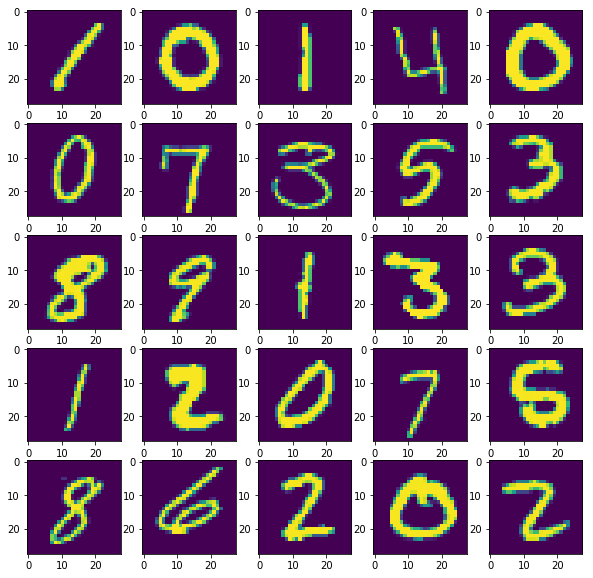

In [5]:
nfigs = 5
fig = plt.figure(figsize=(10,10))
for i in range(nfigs ** 2):
    ax = fig.add_subplot(nfigs, nfigs, i+1)
    ax.imshow(mnist_x[i].reshape(28, 28))

In [6]:
grid_params = {"n_neighbors": range(4, 21),
               "weights": ["uniform", "distance"]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, grid_params, verbose=2, n_jobs=-1)
grid_search.fit(mnist_x, mnist_y)

Fitting 3 folds for each of 34 candidates, totalling 102 fits
[CV] n_neighbors=4, weights=uniform ..................................
[CV] n_neighbors=4, weights=uniform ..................................
[CV] n_neighbors=4, weights=uniform ..................................
[CV] n_neighbors=4, weights=distance .................................
[CV] n_neighbors=4, weights=distance .................................
[CV] n_neighbors=4, weights=distance .................................
[CV] n_neighbors=5, weights=uniform ..................................
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=4, weights=uniform, total=14.3min
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=4, weights=uniform, total=14.4min
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=4, weights=distance, total=14.4min
[CV] n_neighbor

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 171.7min


[CV] ................... n_neighbors=8, weights=uniform, total=14.0min
[CV] n_neighbors=9, weights=distance .................................
[CV] ................... n_neighbors=8, weights=uniform, total=14.0min
[CV] n_neighbors=9, weights=distance .................................
[CV] ................... n_neighbors=9, weights=uniform, total=14.1min
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=8, weights=distance, total=14.1min
[CV] n_neighbors=10, weights=uniform .................................
[CV] .................. n_neighbors=8, weights=distance, total=14.1min
[CV] n_neighbors=10, weights=uniform .................................
[CV] ................... n_neighbors=9, weights=uniform, total=14.1min
[CV] n_neighbors=10, weights=uniform .................................
[CV] .................. n_neighbors=8, weights=distance, total=14.1min
[CV] n_neighbors=10, weights=distance ................................
[CV] .

[CV] .................. n_neighbors=18, weights=uniform, total=14.8min
[CV] n_neighbors=19, weights=uniform .................................
[CV] ................. n_neighbors=17, weights=distance, total=14.8min
[CV] n_neighbors=19, weights=uniform .................................
[CV] .................. n_neighbors=18, weights=uniform, total=14.9min
[CV] n_neighbors=19, weights=distance ................................
[CV] ................. n_neighbors=18, weights=distance, total=14.9min
[CV] n_neighbors=19, weights=distance ................................
[CV] .................. n_neighbors=18, weights=uniform, total=14.9min
[CV] n_neighbors=19, weights=distance ................................
[CV] ................. n_neighbors=18, weights=distance, total=15.3min
[CV] n_neighbors=20, weights=uniform .................................
[CV] ................. n_neighbors=18, weights=distance, total=15.4min
[CV] n_neighbors=20, weights=uniform .................................
[CV] .

[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed: 544.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(4, 21), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [9]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [7]:
for par, tscore in zip(grid_search.cv_results_["params"], grid_search.cv_results_["mean_test_score"]):
    print(par, tscore)

{'n_neighbors': 4, 'weights': 'uniform'} 0.946785714286
{'n_neighbors': 4, 'weights': 'distance'} 0.965214285714
{'n_neighbors': 5, 'weights': 'uniform'} 0.960571428571
{'n_neighbors': 5, 'weights': 'distance'} 0.960571428571
{'n_neighbors': 6, 'weights': 'uniform'} 0.947928571429
{'n_neighbors': 6, 'weights': 'distance'} 0.962666666667
{'n_neighbors': 7, 'weights': 'uniform'} 0.9575
{'n_neighbors': 7, 'weights': 'distance'} 0.957523809524
{'n_neighbors': 8, 'weights': 'uniform'} 0.947595238095
{'n_neighbors': 8, 'weights': 'distance'} 0.95930952381
{'n_neighbors': 9, 'weights': 'uniform'} 0.954785714286
{'n_neighbors': 9, 'weights': 'distance'} 0.954833333333
{'n_neighbors': 10, 'weights': 'uniform'} 0.945833333333
{'n_neighbors': 10, 'weights': 'distance'} 0.956738095238
{'n_neighbors': 11, 'weights': 'uniform'} 0.95169047619
{'n_neighbors': 11, 'weights': 'distance'} 0.95180952381
{'n_neighbors': 12, 'weights': 'uniform'} 0.944261904762
{'n_neighbors': 12, 'weights': 'distance'} 0.9

In [10]:
test = pd.read_csv("test.txt").values

In [19]:
preds = grid_search.predict(test[0].reshape(-1,1))

ValueError: query data dimension must match training data dimension